In [2]:
import numpy as np
import matplotlib.pyplot as plt
import giddy
import pandas as pd
import libpysal
import mapclassify as mc
import seaborn as sns
sns.set_style("white")

In [3]:
df = pd.read_csv('discret.csv')
df

,Lat,Long,Region,31/03/20,07/04/20,15/04/20,22/04/20,30/04/20,07/05/20,15/05/20,...,22/06/20,30/06/20,07/07/20,15/07/20,22/07/20,31/07/30,07/08/20,15/08/20,22/08/20,30/08/20
0,"-21,50216466","45,20566584",Androy,1,1,1,1,1,1,1,...,1,1,1,1,1,4,1,4,1,4
1,"-25,0333332","46,9833294",Anôsy,1,1,1,1,2,1,1,...,1,1,1,1,3,3,3,3,2,2
2,"-23,35","43,66667",Atsimo_Andrefana,1,2,1,1,2,1,1,...,1,1,1,4,4,3,4,3,2,3
3,"-22,40293","46,12576",Ihorombe,1,1,1,1,1,1,1,...,1,1,1,2,1,2,3,1,3,4
4,"-20,28416553","44,31716538",Menabe,1,1,1,1,1,1,1,...,1,1,2,1,2,1,4,4,4,3
5,"-17,166666","49,2999988",Analanjirofo,1,1,2,1,1,1,1,...,4,3,2,3,4,3,2,1,1,1
6,"-12,2666656","49,2833322",Diana,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,4,4,4
7,"-14,8833298","50,2833322",Sava,1,1,1,1,1,1,1,...,1,2,1,2,1,4,3,3,4,4
8,"-14,87239818","47,9833994",Sofia,1,1,1,1,1,1,1,...,1,1,1,2,2,3,3,3,3,4
9,"-15,71667","46,31667",Boeny,1,1,1,1,1,1,1,...,1,2,2,2,4,4,4,4,2,2


In [4]:
c = np.array(df.iloc[:,3:])
c

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4],
       [1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 4, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2],
       [1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 4, 4, 3, 4, 3, 2, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 3, 4],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 4, 4, 4, 3],
       [1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 4, 4, 3, 2, 3, 4, 3, 2, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 4, 3, 3, 4, 4],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 4],
       [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 4, 4, 4, 4, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 2, 2, 4, 4],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 2, 1, 1, 2, 3, 4, 4, 3, 2,

In [5]:
m = giddy.markov.Markov(c)

The Markov Chain is irreducible and is composed by:
1 Recurrent class (indices):
[0 1 2 3]
0 Transient classes.
The Markov Chain has 0 absorbing states.


In [6]:
#print(m.classes)
#print(len(m.classes))
print(m.transitions)
print(m.p)
print(m.steady_state)#loi stationnaire

[[215.  29.   3.  12.]
 [ 21.  49.  14.   7.]
 [  1.  11.  12.  16.]
 [  5.   7.  16.  22.]]
[[0.83011583 0.11196911 0.01158301 0.04633205]
 [0.23076923 0.53846154 0.15384615 0.07692308]
 [0.025      0.275      0.3        0.4       ]
 [0.1        0.14       0.32       0.44      ]]
[0.44977014 0.24278873 0.13817938 0.16926175]


In [7]:
print(m.sojourn_time)

[5.88636364 2.16666667 1.42857143 1.78571429]


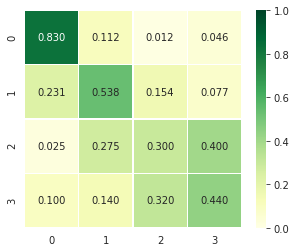

In [8]:
fig, ax1 = plt.subplots(figsize = (5,4))
im = sns.heatmap(m.p, annot=True, linewidths=.4, ax=ax1, cbar=True, vmin=0, vmax=1,square=True,  cmap="YlGn",fmt='.3f')
#plt.savefig('global.pdf')

In [9]:
import geopandas as gpd
import pandas as pd
from esda.moran import Moran
sf = gpd.read_file('features.json')
data = pd.read_excel('temporel.xlsx')
data

,Lat,Long,Region,2020-03-31 00:00:00,2020-04-07 00:00:00,2020-04-15 00:00:00,2020-04-22 00:00:00,2020-04-30 00:00:00,2020-05-07 00:00:00,2020-05-15 00:00:00,...,2020-06-22 00:00:00,2020-06-30 00:00:00,2020-07-07 00:00:00,2020-07-15 00:00:00,2020-07-22 00:00:00,1930-07-31 00:00:00,2020-08-07 00:00:00,2020-08-15 00:00:00,2020-08-22 00:00:00,2020-08-30 00:00:00
0,-21.502165,45.205666,Androy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.636364,0.000000,7.636364,0.000000,5.727273
1,-25.033333,46.983329,Anôsy,0.000000,0.000000,0.000000,0.000000,0.225806,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.806452,1.580645,1.354839,2.483871,0.451613,0.677419
2,-23.350000,43.666670,Atsimo_Andrefana,0.000000,0.242775,0.000000,0.000000,0.364162,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.034682,5.705202,2.791908,4.005780,2.549133,0.364162,1.213873
3,-22.402930,46.125760,Ihorombe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.768293,0.000000,0.256098,2.048780,0.000000,2.560976,15.365854
4,-20.284166,44.317165,Menabe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.368421,0.000000,0.368421,0.000000,4.421053,4.421053,8.473684,2.947368
5,-17.166666,49.299999,Analanjirofo,0.000000,0.000000,0.201923,0.000000,0.000000,0.000000,0.000000,...,3.432692,1.413462,0.201923,2.625000,5.048077,1.211538,0.403846,0.000000,0.000000,0.000000
6,-12.266666,49.283332,Diana,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.565217,8.673913,7.760870
7,-14.883330,50.283332,Sava,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.235955,0.000000,0.235955,0.000000,3.775281,2.123596,2.831461,4.719101,7.078652
8,-14.872398,47.983399,Sofia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.184211,0.552632,2.947368,2.763158,2.763158,2.947368,8.842105
9,-15.716670,46.316670,Boeny,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.055851,0.167553,0.949468,4.300532,5.138298,5.529255,3.574468,0.446809,0.614362


In [12]:
w = libpysal.io.open('GALfile.gal').read()
w.transform = 'R'

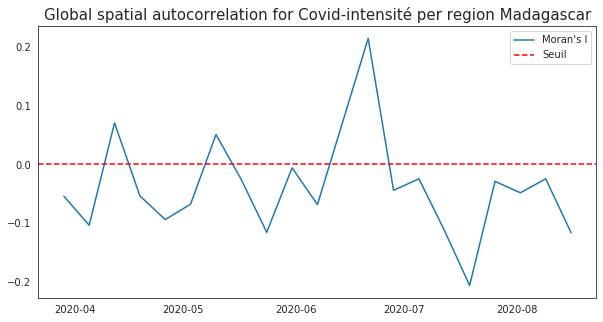

In [14]:
pci = np.array(data.iloc[:,3:]).transpose()
mits = [Moran(cs, w) for cs in pci]
date = pd.date_range(start='2020-03-25', periods=21,freq='W')
res = np.array([(mi.I, mi.EI, mi.seI_norm, mi.sim[974]) for mi in mits])
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (10,5) )
plt.plot(date,res[:,0], label='Moran\'s I')
plt.axhline(y=0,xmin=0, xmax=1,color='red',linestyle="--",label='Seuil')
ax.set_title("Global spatial autocorrelation for Covid-intensité per region Madagascar",fontdict={'fontsize':15})
ax.legend()
#plt.savefig('Moran_delaunay.pdf')
#plt.savefig('Moran_delaunay.jpg',dpi=500)

In [31]:
cc = np.array([1, 2, 3, 4])
sm = giddy.markov.Spatial_Markov(c,w,cutoffs=cc,fixed=False,m=4,k=4,discrete=True)#m:regime,k=classe
print(sm.P.shape)

(4, 4, 4)


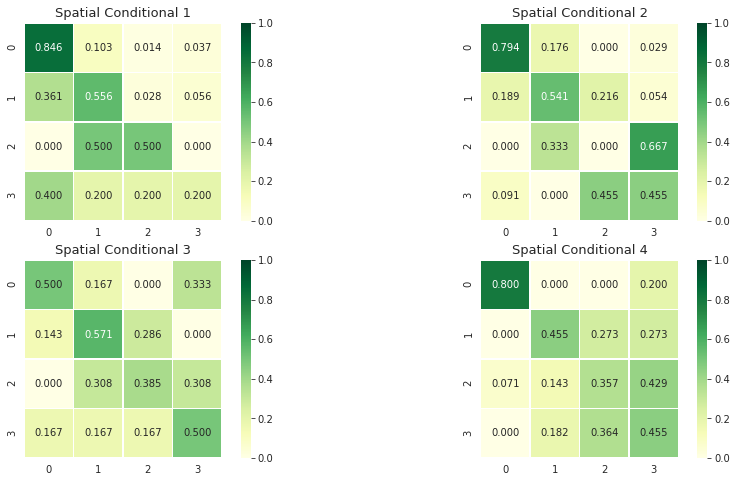

In [32]:
fig, axes = plt.subplots(2,2,figsize = (15,8))

for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i==1 and j==2:
            ax.axis('off')
            continue
        p_temp = sm.P[i*2+j]
        im = sns.heatmap(p_temp, annot=True, linewidths=.5, ax=ax, cbar=True, vmin=0, vmax=1,
                          square=True, cmap="YlGn",fmt='.3f')
        ax.set_title("Spatial Conditional %d"%(i*2+j+1),fontsize=13)
#plt.savefig('spatiale.pdf')

In [15]:
print(sm.T)

[[[180.  22.   3.   7.]
  [ 13.  20.   1.   2.]
  [  0.   2.   2.   1.]
  [  2.   1.   1.   1.]]

 [[ 28.   6.   0.   1.]
  [  7.  20.   8.   2.]
  [  1.   3.   0.   6.]
  [  1.   0.   5.   5.]]

 [[  4.   1.   0.   2.]
  [  0.   4.   1.   0.]
  [  0.   4.   4.   2.]
  [  2.   2.   2.   6.]]

 [[  3.   0.   0.   2.]
  [  1.   5.   4.   3.]
  [  0.   2.   6.   7.]
  [  0.   4.   8.  10.]]]


In [33]:
giddy.markov.Homogeneity_Results(sm.T).summary()

-----------------------------------------
         Markov Homogeneity Test         
-----------------------------------------
Number of classes: 4
Number of transitions: 440
Number of regimes: 4
Regime names: 0, 1, 2, 3
-----------------------------------------
   Test                   LR                Chi-2
  Stat.               60.953               59.021
    DOF                   36                   36
p-value                0.006                0.009
-----------------------------------------
P(H0)        0        1        2        3
    0    0.830    0.112    0.012    0.046
    1    0.231    0.538    0.154    0.077
    2    0.025    0.275    0.300    0.400
    3    0.100    0.140    0.320    0.440
-----------------------------------------
P(0)         0        1        2        3
    0    0.846    0.103    0.014    0.037
    1    0.361    0.556    0.028    0.056
    2    0.000    0.500    0.500    0.000
    3    0.400    0.200    0.200    0.200
----------------------------------

In [41]:
w = libpysal.io.open('k3.gal').read()
w.full()
W = w.full()[0]

In [45]:
p_etat = np.array(([1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[0,1,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0],[1,0,0,0]),dtype=float)
etat = np.unravel_index(np.argmax(p_etat,axis=1),(22,1))[0]+1
etat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
for i in range(1000):
    p_etat[12]=p_etat[12].dot(sm.P[0])
print(p_etat[12])

[0.66882465 0.23306173 0.0506753  0.04743833]


In [43]:
for i in range(1000):
    etat = np.unravel_index(np.argmax(p_etat,axis=1),(22,1))[0]+1
    for j in range(22):
        if np.array(np.around(np.average(etat, weights=W[j,:])),dtype='int8')==4:
            p_etat[j]=p_etat[j].dot(sm.P[3])
        elif np.array(np.around(np.average(etat, weights=W[j,:])),dtype='int8')==2:
            p_etat[j]=p_etat[j].dot(sm.P[1])
        elif np.array(np.around(np.average(etat, weights=W[j,:])),dtype='int8')==3:
            p_etat[j]=p_etat[j].dot(sm.P[2])     
        elif np.array(np.around(np.average(etat, weights=W[j,:])),dtype='int8')==1:
            p_etat[j]=p_etat[j].dot(sm.P[0])

In [44]:
p_etat

array([[0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173, 0.0506753 , 0.04743833],
       [0.66882465, 0.23306173,